In [1]:
import sys
sys.path.append('../../public-Git/')
sys.path.append('../../public-Git/demo_Intraday/')

from factor_function import *
from utils.stg_functions_local import *

%matplotlib inline

In [6]:
class mom_rev(Factor):
    name = 'mom_rev'
    islimitbuy = True
    islimitsell = True
    # 依赖的基础因子名称，包含 'datetime', 'date', 'time', 'issue', 'open', 'high', 'low', 'close',
    #                           'volume', 'value', 'num_trades', 'vwap1', 'vwap2', 'preclose', 'adj',
    #                           'is_limit_buy', 'is_limit_sell', 'filterFlag'字段
    dependencies = ['close', 'preclose']

    def calc(self, data):
        # 准备所需字段
        close = data['close'].replace([0], np.nan)
        # preclose = data['preclose'].replace([0], np.nan)
        preclose = data['close'].shift(1).fillna(data['preclose']).replace([0], np.nan)
        ret = close/preclose - 1
        # 对于frequency='30m'和frequency='60m',可用数据截止到1453,对于后面的行删除
        factor_time = (close.index.hour*100+close.index.minute) < 1458

        ret = ret.loc[factor_time, :]
        factor_rev = -(ret.sub(ret.mean(axis=1, skipna=True), axis=0).div((ret.max(axis=1, skipna=True)-ret.min(axis=1, skipna=True)).replace(0, np.nan), axis=0))
        factor_rev_decay = factor_rev * 0
        for i in range(5):
            weight = 1 - 0.2 * i
            factor_rev_decay += factor_rev.shift(i, fill_value=0) * weight
        return factor_rev_decay.replace([-np.inf, np.inf], np.nan)

开始计算mom_rev
0 1.0
1 0.8
2 0.6
3 0.3999999999999999
4 0.19999999999999996
因子数据计算完成，耗时0:00:00.696307
********************************************************************************************************************************************************************************************************

********************************************************************************************************************************************************************************************************
mom_rev------输出对标超额收益模式指标
Dropped 0.1% entries from factor data: 0.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 5.0%, not exceeded: OK!
FactorValues Quantiles Statistics


,min,max,mean,std,count,daily_count,count %
factor_quantile,,,,,,,
1,-1.170516,-0.040226,-0.216690,0.101629,120834,99.0,2.09
2,-0.280651,-0.029026,-0.114848,0.031455,120252,99.0,2.08
3,-0.201292,-0.023520,-0.086359,0.022700,120295,99.0,2.08
4,-0.157462,-0.018797,-0.070311,0.018039,120189,99.0,2.08
5,-0.130408,-0.015875,-0.059359,0.014911,120291,99.0,2.08
6,-0.104681,-0.013438,-0.051194,0.012638,120314,99.0,2.08
7,-0.087079,-0.011536,-0.044714,0.010906,120187,99.0,2.08
8,-0.079553,-0.010036,-0.039315,0.009517,120173,99.0,2.08
9,-0.071475,-0.008522,-0.034705,0.008393,120348,99.0,2.08


Turnover Analysis


,1D
QuantileTop Mean Turnover,2.031




Benchmark AnalysisMode Returns Analysis 


,factor
Top Return(%),-8.18
Bottom Return,-150.38
Top ReturnAE(%),-47.66
Top ReturnAE MDD(%),-40.24
Top ReturnAE SPR,-0.17




Benchmark AnalysisMode Returns Analysis By Year 


,Top Ret(%),Top RetAE(%),Bottom Ret(%),SPR,MDD(%)
date,,,,,
2023,-8.18,-47.66,-150.38,-2.7,-40.24




Information Analysis


,ret
IC Mean,0.123
IR,0.232
IC Mean SD_20D,0.386
IR SD_20D,0.893
IC Mean SD_60D,0.528
IR SD_60D,1.387




                        factor
Top ReturnAE(%)     -47.661907
Top ReturnAE MDD(%) -40.239272
Top ReturnAE SPR     -0.173478
IC_20                 0.386322
IR_20                 0.892813
IC_60                 0.528179
IR_60                 1.386857
Top Mean turnover     2.030804
mom_rev计算完成，耗时0:00:16.419874


<Figure size 640x480 with 0 Axes>

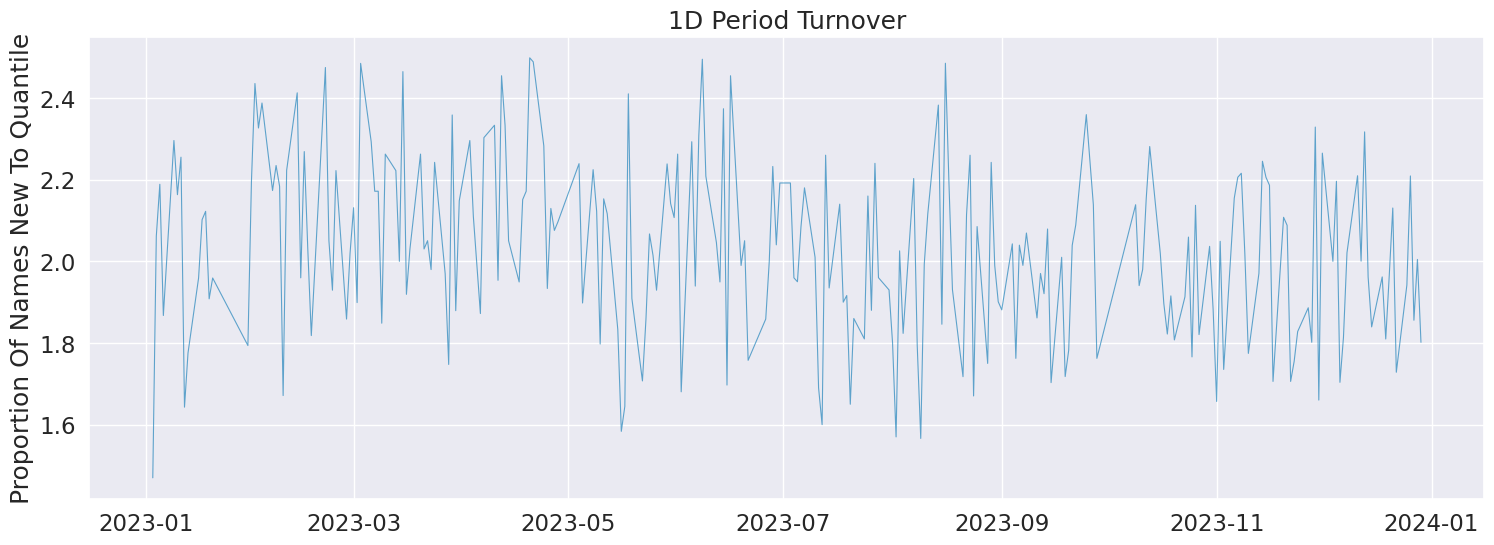

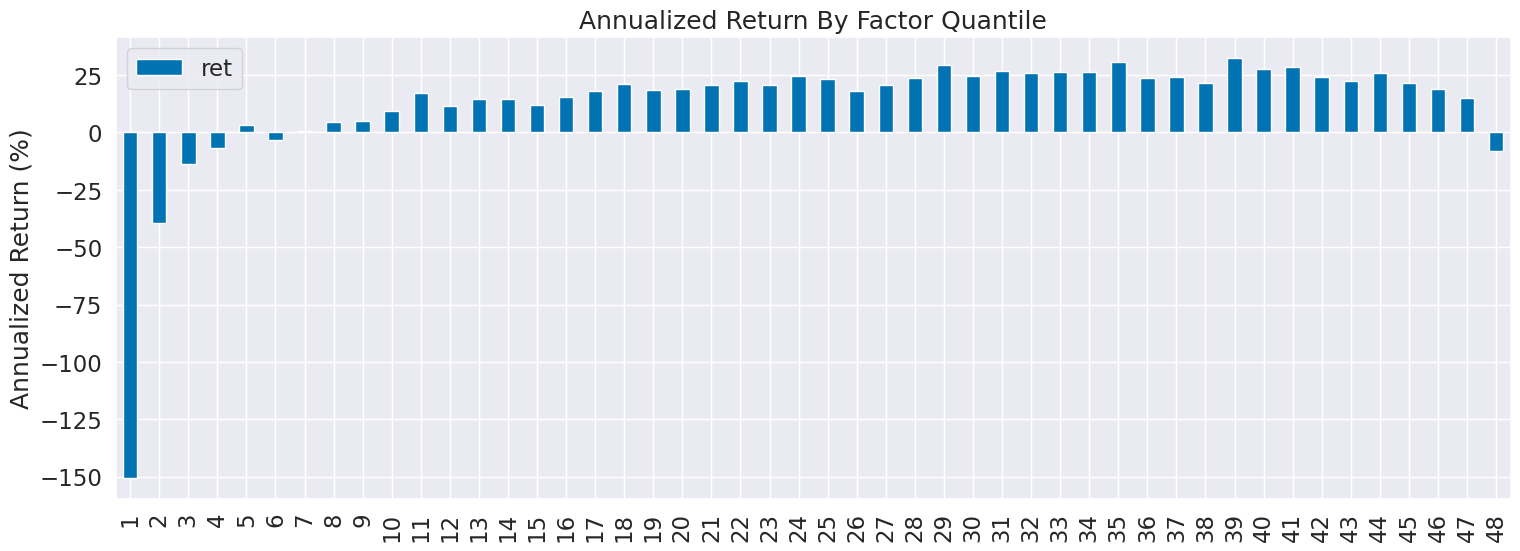

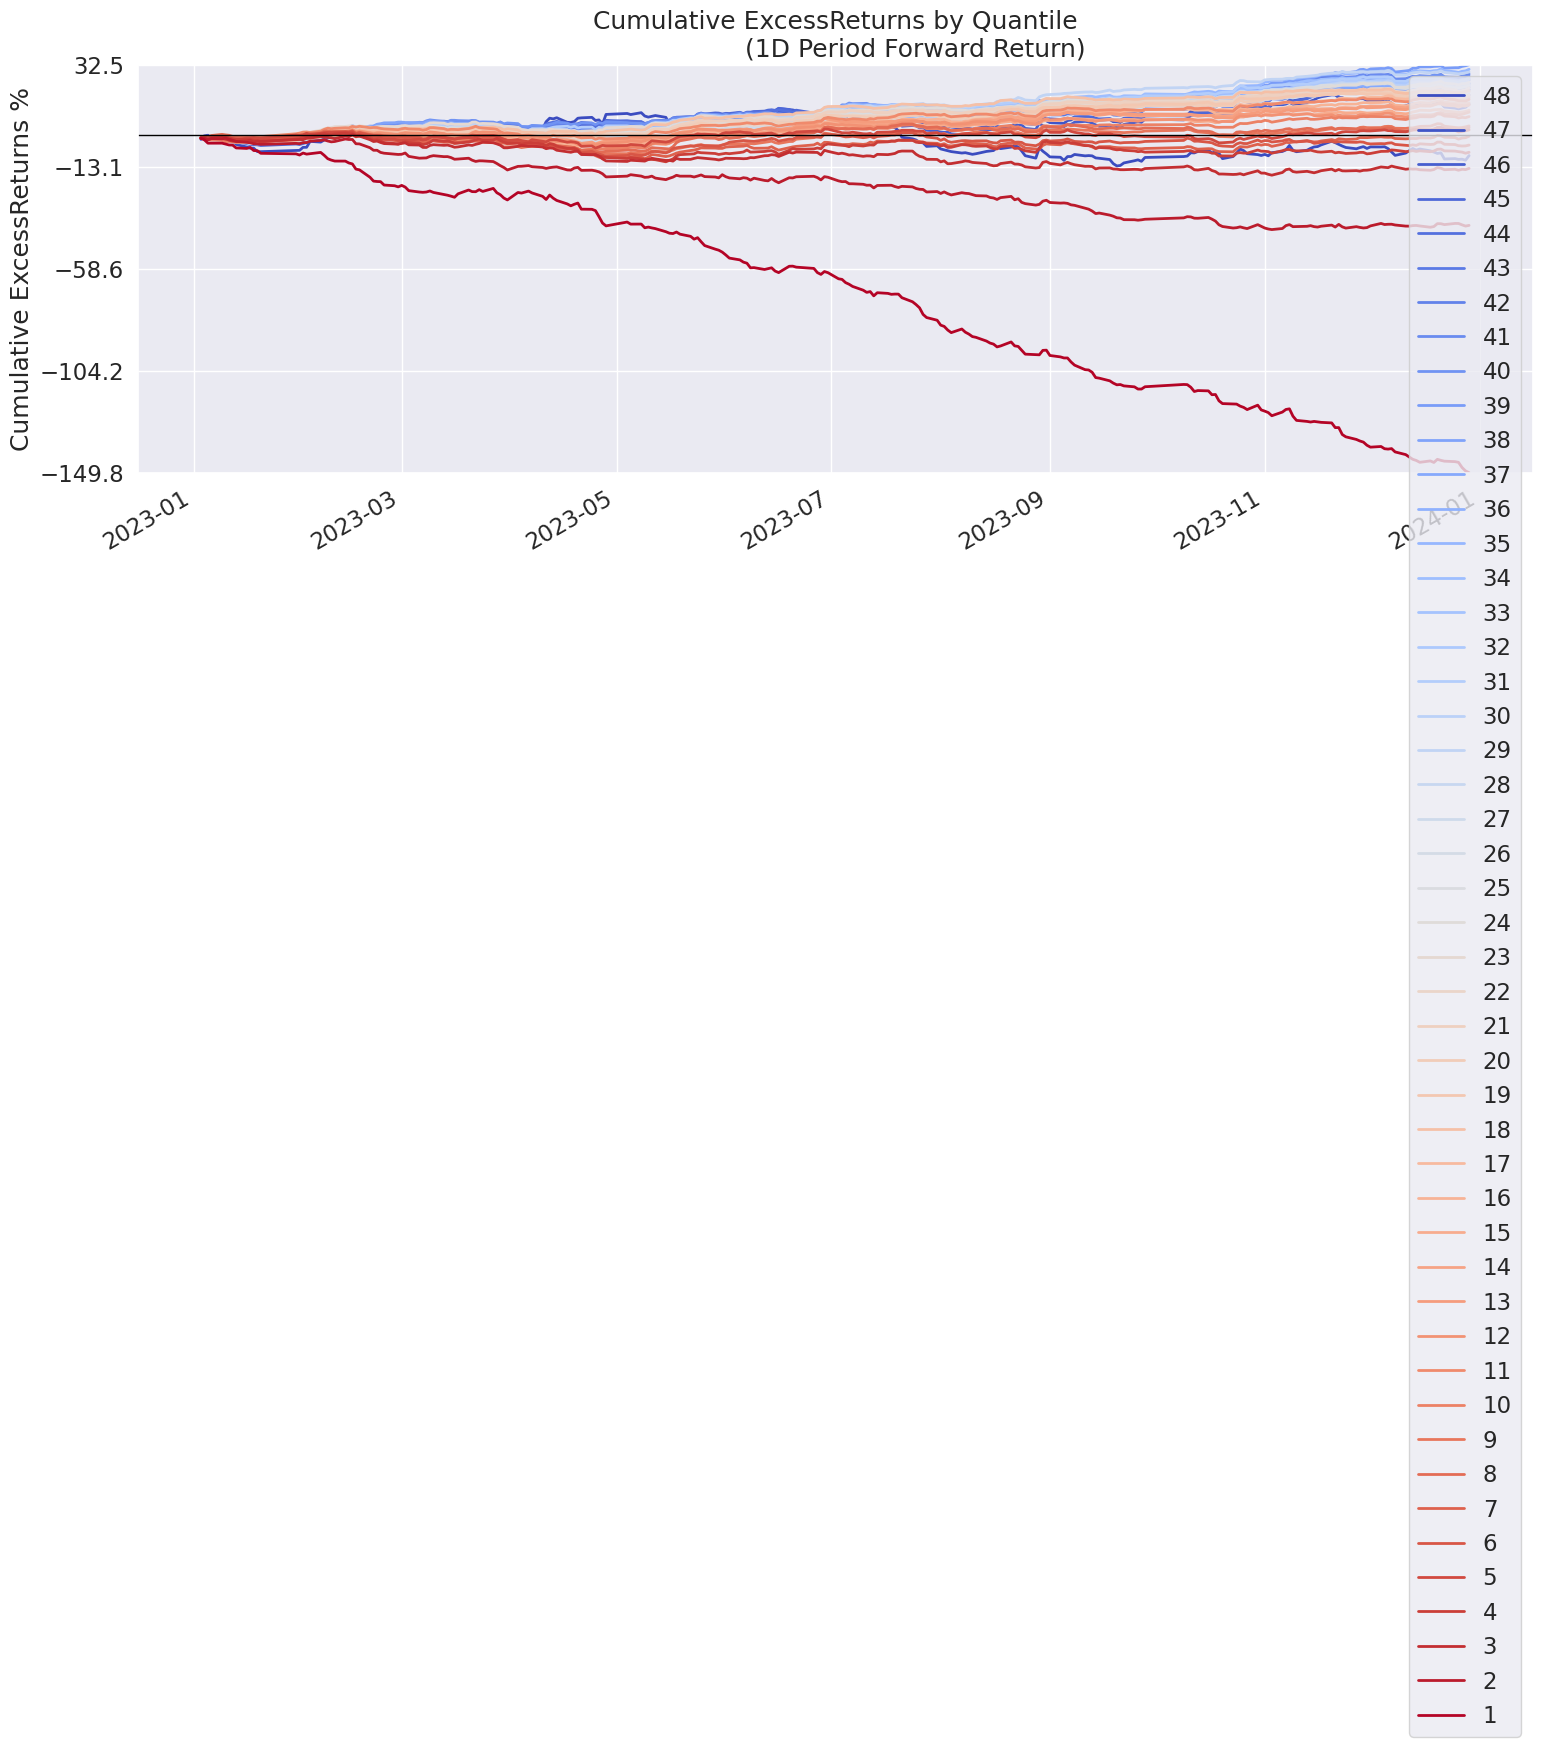

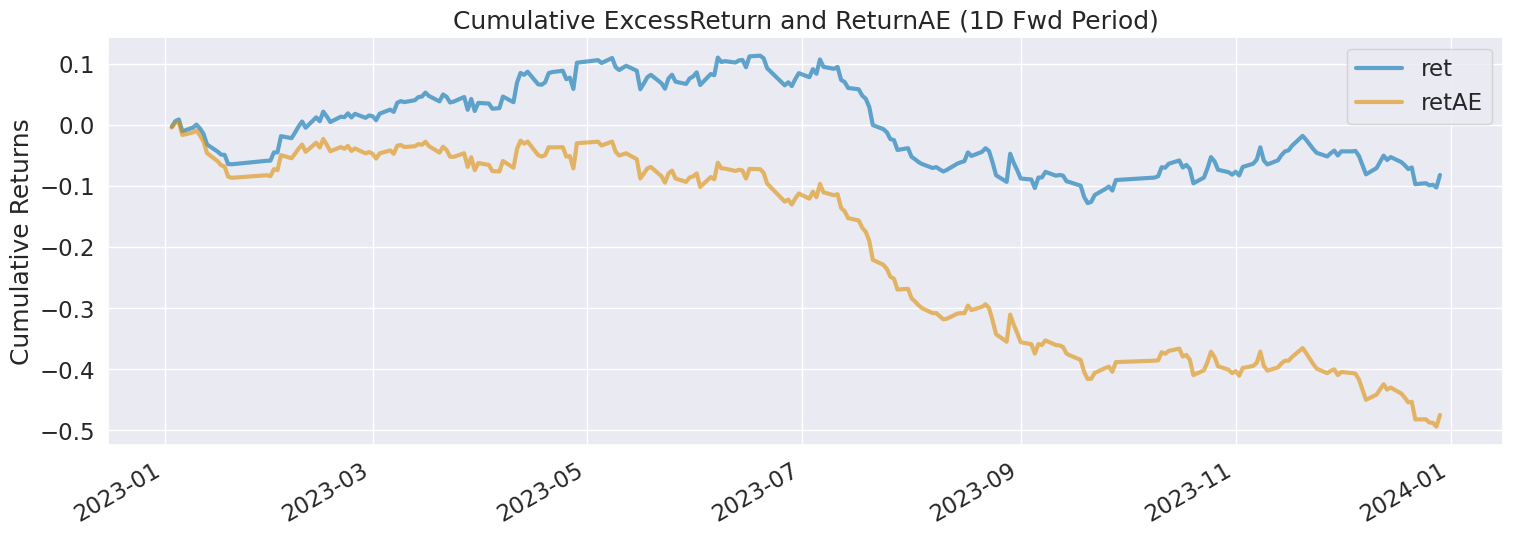

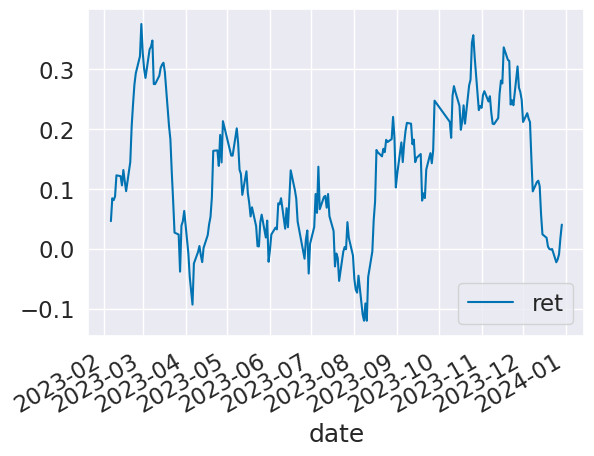

In [7]:
index_code = '000905'

get_base_price(start_date='20230101', end_date='20231231', frequency='60m')

start_datetime = datetime.datetime(2023, 1, 1)
end_datetime = datetime.datetime(2023, 12, 30)
factor = mom_rev()

time_tik = datetime.datetime.now()
print(f"开始计算{factor.name}")
results = analysis(start_datetime=start_datetime, end_datetime=end_datetime, factor=factor, benchmark=index_code, plot=True)
print(f"{factor.name}计算完成，耗时{datetime.datetime.now()-time_tik}")